In [10]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Одномерная оптимизация

In [11]:
# Первая функция
def f1(x):
    return (x ** 2 - 1) ** 2

# Вторая функция
def f2(x):
    return 2 ** x - np.log(x)

# Третья функция
def f3(x):
    return x / 2 - np.sin(x)

In [12]:
# Поиск чисел Фибоначчи

def Fi(n):
    
    F1 = 1
    F2 = 1
    
    for __ in range(n):
        F1, F2 = F2, F1 + F2

    return F1

In [13]:
# Метод Фибоначчи
def Fibonacci_Method(a, b, eps, f):
    
    # Ищем количество вычислений n – наименьшее целое число, при котором F(n) >= | b - a | / epsilon
    n = 0
    while Fi(n) < (abs(b - a) / eps):
        n += 1

    k = 0 # количество итераций
    
    # ищем две симметричные относительно центра отрезка точки
    x = a + (b - a) * (Fi(n - 2) / Fi(n))
    y = a + (b - a) * (Fi(n - 1) / Fi(n))
    
    # пока k не равно n-3
    while k != n - 3:

        k += 1
        
        # отбрасываем правый полуинтервал
        if f(x) <= f(y):
            b = y
            y = x
            x = a + (b - a) * (Fi(n - k - 3) / Fi(n - k - 1))
        
        # отбрасываем левый полуинтервал
        elif f(x) > f(y):
            a = x
            x = y
            y = a + (b - a) * (Fi(n - k - 2) / Fi(n - k - 1))

    y = x + eps
    
    # вычисляюем значения функции и находим границы конечного отрезка локализации
    if f(x) <= f(y):
        b = y
    elif f(x) > f(y):
        a = x
    
    return (a + b) / 2 # точка минимума

In [14]:
a = 0.5
b = 2
eps = 0.01

x_min = Fibonacci_Method(a, b, eps, f1)

In [15]:
print('x_min =', x_min)
print('y_min =', f1(x_min))

x_min = 0.9997769916666093
y_min = 1.9888650627909908e-07


In [16]:
a = 1/3
b = 2
eps = 0.01

x_min = Fibonacci_Method(a, b, eps, f2)

In [17]:
print('x_min =', x_min)
print('y_min =', f2(x_min))

x_min = 0.818662948904305
y_min = 1.963853439186322


In [18]:
a = 0
b = 3/2
eps = 0.01

x_min = Fibonacci_Method(a, b, eps, f3)

In [19]:
print('x_min =', x_min)
print('y_min =', f3(x_min))

x_min = 1.0518530558027592
y_min = -0.3424172347971737


### 2. Многомерная оптимизация (безусловная)

In [20]:
# функция
def function(x, y):
    return 4 * x ** 2 + 4 * x * y + 6 * y ** 2 - 17 * x

# градиент
def gradient(x, y):
    return np.array([8 * x + 4 * y - 17, 4 * x + 12 * y])

In [21]:
# функция, зависящая от альфа
def f(x0, y0, hx0, hy0, a):
    return 4 * (x0 + a * hx0) ** 2 + 4 * (x0 + a * hx0) * (y0 + a * hy0) + 6 * (y0 + a * hy0) ** 2 - 17 * (x0 + a * hx0)

# функция для поиска альфа, зависящая от парам☼тра
def ff(a):
    return f(x0, y0, hx0, hy0, a)

In [22]:
# поиск альфа  помошью метода Фибоначчи
def step_size(a, b):
    
    n = 0
    
    while Fi(n) <= (abs(b - a) / eps):
        n += 1

    k = 0

    x = a + (b - a) * (Fi(n - 2) / Fi(n))
    y = a + (b - a) * (Fi(n - 1) / Fi(n))

    while k != (n - 3):

        k += 1

        if ff(x) <= ff(y):
            b = y
            y = x
            x = a + (b - a) * (Fi(n - k - 3) / Fi(n - k -1))

        elif ff(x) > ff(y):
            a = x
            x = y
            y = a + (b - a) * (Fi(n - k - 2) / Fi(n - k -1))

    y = x + eps

    if ff(x) <= ff(y):
        b = y
    elif ff(x) > ff(y):
        a = x
    
    alpha = (a + b) / 2
    
    return alpha

In [29]:
x0, y0 = -5, -3 # задём начальную точку
hx0, hy0 = -gradient(x0, y0) # антиградиент
k = 0 # количество шагов
steps = [] # записываем координаты шагов
steps.append([x0, y0])

# пока не выполнилось условие остановки
while np.sqrt(gradient(x0, y0)[0] ** 2 + gradient(x0, y0)[1] ** 2) > 0.01:
    
    k += 1
    
    alpha = step_size(a = 0, b = 1) # рассчитываем альфа
    
    # вычисляем x_k+1 = x_k + alpha_k * h_k
    x1 = x0 + alpha * hx0
    y1 = y0 + alpha * hy0
    
    # вычисляем антиградиент в новой точке
    hx1 = -gradient(x1, y1)[0]
    hy1 = -gradient(x1, y1)[1]
    
    # добавляем координаты нового шага
    x0 = x1
    y0 = y1
    steps.append([x0, y0])

    hx0 = hx1
    hy0 = hy1

In [30]:
print(f'k = {k} \nx1 = {x0} \nx2 = {y0} \nf* = {function(x0, y0)}')

k = 10 
x1 = 2.5490344480498277 
x2 = -0.8499921787321593 
f* = -21.674996300678057


Text(0.5, 0, 'x2')

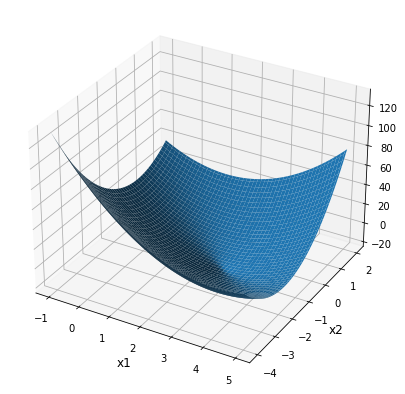

In [25]:
# изображаем функцию

fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

x = np.linspace(-1, 5, 100)
y = np.linspace(-4, 2, 100)
x, y = np.meshgrid(x, y)
z = 4 * x ** 2 + 4 * x * y + 6 * y ** 2 - 17 * x

ax.plot_surface(x, y, z)
ax.set_xlabel('x1', fontsize = 12)
ax.set_ylabel('x2', fontsize = 12)

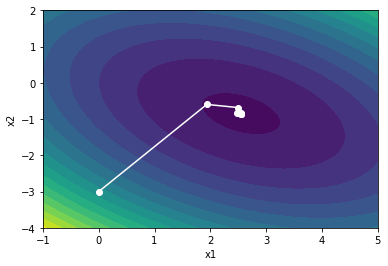

In [26]:
# изображаем траекторию спуска

fig = plt.figure()

x = np.linspace(-1, 5, 100)
y = np.linspace(-4, 2, 100)

x, y = np.meshgrid(x, y)
z = 4 * x ** 2 + 4 * x * y + 6 * y ** 2 - 17 * x

plt.contourf(x, y, z, 15)
plt.plot(x0, y0, 'o-', color='white')
plt.xlabel('x1')
plt.ylabel('x2')

steps = np.matrix(steps)
plt.plot(steps[:,0], steps[:,1], '-o', color='white')